# [DEV][PPO] Crawler

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

# widget bar to display progress
#!pip install progressbar
import progressbar as pb

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name='Crawler.app', worker_id=101,  no_graphics=False)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: CrawlerBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 129
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 20
        Vector Action descriptions: , , , , , , , , , , , , , , , , , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# name of brain
print('Name of brain:', brain_name)

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Name of brain: CrawlerBrain
Number of agents: 12
Size of each action: 20
There are 12 agents. Each observes a state with length: 129
The state for the first agent looks like: [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  2.25000000e+00
  1.00000000e+00  0.00000000e+00  1.78813934e-07  0.00000000e+00
  1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  6.06093168e-01 -1.42857209e-01 -6.06078804e-01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.33339906e+00 -1.42857209e-01
 -1.33341408e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [4]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
t = 0                                                  # keep track of the trajectory
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))
#env.close()

Total score (averaged over agents) this episode: 3.497711189867308


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [5]:
def saveTrainedModel(agent, path):
    state_dicts = {'actor_model': agent.model_local.actor.state_dict(),
                   'critic_model': agent.model_local.critic.state_dict()}
    torch.save(state_dicts, path)
    
def loadTrainedModel(agent, path):
    state_dicts = torch.load(path,map_location={'cuda:0': 'cpu'})

    agent.model_local.actor.load_state_dict(state_dicts['actor_model'])
    agent.model_local.critic.load_state_dict(state_dicts['critic_model'])
    
    return agent

In [6]:
from PPO_agent import PPO_Agent
#import PPO_util 

model_dir = 'saved_models/'
model_name = 'unity_continuous_' + str(brain_name) + '_' + str(num_agents) + '_maxscore6' + '_agents.pt'

agent = PPO_Agent(env, state_size, action_size, num_agents=num_agents, seed=0)
agent = loadTrainedModel(agent, model_dir+model_name)

current device:  cpu


In [7]:
episode_max = 1000 # training loop max iterations
episode_reward = 0.0
mean_rewards = []
max_score = -np.inf
e = 0
goal_reached = False

while e < episode_max:

    # collect trajectories
    agent.step()
    episode_reward = agent.episodic_rewards

    # display some progress every 20 iterations
    if agent.is_training:

        # get the average reward of the parallel environments
        mean_rewards.append(np.mean(episode_reward))        
        
        if (e+5)%1==0 :
            print("e: {}  score: {:.2f}  Avg score(100e): {:.2f}  "
                  "A(g): {:.2f}  C(l): {:.2f}  std: {:.2f}  steps: {}".format(e+1, np.mean(episode_reward),
                                                                              np.mean(mean_rewards[-100:]),
                                                                              np.mean(agent.actor_gain_hist), 
                                                                              np.mean(agent.critic_loss_hist),
                                                                              agent.std_scale, 
                                                                              int(np.mean(agent.total_steps))))
        if np.mean(mean_rewards[-100:]) > max_score:
            max_score = np.mean(mean_rewards[-100:])
            saveTrainedModel(agent, model_dir + model_name)
            
        if np.mean(episode_reward) >= 2000 and not goal_reached :
            goal_reached = True
            episode_max = e + 5
            print("Score reached benchmark of 2000. Problem Solved!")
        
        e += 1
    else:
        print('\rFetching experiences... {} '.format(len(agent.memory.memory)), end="")
        

Fetching experiences... 30720 Prefetch completed. Training starts! 
Number of Agents:  12
Device:  cpu
e: 1  score: 55.21  Avg score(100e): 55.21  A(g): -0.04  C(l): 0.54  std: 0.99  steps: 1000
e: 2  score: 55.31  Avg score(100e): 55.26  A(g): -0.04  C(l): 0.54  std: 0.99  steps: 1000
e: 3  score: 55.93  Avg score(100e): 55.48  A(g): -0.04  C(l): 0.54  std: 0.99  steps: 1000
e: 4  score: 56.00  Avg score(100e): 55.61  A(g): -0.04  C(l): 0.54  std: 0.99  steps: 1000
e: 5  score: 56.02  Avg score(100e): 55.69  A(g): -0.04  C(l): 0.54  std: 0.99  steps: 1000
e: 6  score: 56.19  Avg score(100e): 55.77  A(g): -0.04  C(l): 0.54  std: 0.99  steps: 1000
e: 7  score: 56.38  Avg score(100e): 55.86  A(g): -0.04  C(l): 0.51  std: 0.99  steps: 1000
e: 8  score: 56.55  Avg score(100e): 55.95  A(g): -0.04  C(l): 0.51  std: 0.99  steps: 1000
e: 9  score: 56.68  Avg score(100e): 56.03  A(g): -0.04  C(l): 0.51  std: 0.99  steps: 1000
e: 10  score: 56.35  Avg score(100e): 56.06  A(g): -0.04  C(l): 0.51 

e: 89  score: 61.37  Avg score(100e): 58.52  A(g): -0.06  C(l): 0.06  std: 0.93  steps: 1000
e: 90  score: 61.45  Avg score(100e): 58.55  A(g): -0.06  C(l): 0.06  std: 0.93  steps: 1000
e: 91  score: 61.58  Avg score(100e): 58.58  A(g): -0.06  C(l): 0.06  std: 0.92  steps: 1000
e: 92  score: 61.54  Avg score(100e): 58.62  A(g): -0.06  C(l): 0.06  std: 0.92  steps: 1000
e: 93  score: 61.66  Avg score(100e): 58.65  A(g): -0.06  C(l): 0.06  std: 0.92  steps: 1000
e: 94  score: 61.81  Avg score(100e): 58.68  A(g): -0.06  C(l): 0.06  std: 0.92  steps: 1000
e: 95  score: 61.83  Avg score(100e): 58.71  A(g): -0.06  C(l): 0.06  std: 0.92  steps: 1000
e: 96  score: 61.99  Avg score(100e): 58.75  A(g): -0.06  C(l): 0.06  std: 0.92  steps: 1000
e: 97  score: 62.08  Avg score(100e): 58.78  A(g): -0.06  C(l): 0.06  std: 0.92  steps: 1000
e: 98  score: 62.18  Avg score(100e): 58.82  A(g): -0.06  C(l): 0.06  std: 0.92  steps: 1000
e: 99  score: 62.32  Avg score(100e): 58.85  A(g): -0.06  C(l): 0.06  

e: 177  score: 70.57  Avg score(100e): 64.81  A(g): -0.09  C(l): 0.10  std: 0.86  steps: 1000
e: 178  score: 70.75  Avg score(100e): 64.92  A(g): -0.09  C(l): 0.10  std: 0.86  steps: 1000
e: 179  score: 70.85  Avg score(100e): 65.02  A(g): -0.09  C(l): 0.10  std: 0.86  steps: 1000
e: 180  score: 71.08  Avg score(100e): 65.12  A(g): -0.09  C(l): 0.10  std: 0.86  steps: 1000
e: 181  score: 71.31  Avg score(100e): 65.23  A(g): -0.09  C(l): 0.12  std: 0.86  steps: 1000
e: 182  score: 71.55  Avg score(100e): 65.34  A(g): -0.09  C(l): 0.12  std: 0.86  steps: 1000
e: 183  score: 71.72  Avg score(100e): 65.45  A(g): -0.09  C(l): 0.12  std: 0.86  steps: 1000
e: 184  score: 71.93  Avg score(100e): 65.55  A(g): -0.09  C(l): 0.12  std: 0.86  steps: 1000
e: 185  score: 72.23  Avg score(100e): 65.67  A(g): -0.09  C(l): 0.12  std: 0.86  steps: 1000
e: 186  score: 72.49  Avg score(100e): 65.78  A(g): -0.09  C(l): 0.12  std: 0.86  steps: 1000
e: 187  score: 72.64  Avg score(100e): 65.89  A(g): -0.10  C

e: 265  score: 109.77  Avg score(100e): 84.17  A(g): -0.12  C(l): 0.34  std: 0.80  steps: 1000
e: 266  score: 110.44  Avg score(100e): 84.59  A(g): -0.12  C(l): 0.34  std: 0.80  steps: 1000
e: 267  score: 111.01  Avg score(100e): 85.01  A(g): -0.12  C(l): 0.34  std: 0.80  steps: 1000
e: 268  score: 111.67  Avg score(100e): 85.44  A(g): -0.12  C(l): 0.34  std: 0.80  steps: 1000
e: 269  score: 112.32  Avg score(100e): 85.88  A(g): -0.12  C(l): 0.34  std: 0.80  steps: 1000
e: 270  score: 112.90  Avg score(100e): 86.31  A(g): -0.12  C(l): 0.34  std: 0.80  steps: 1000
e: 271  score: 113.62  Avg score(100e): 86.76  A(g): -0.12  C(l): 0.35  std: 0.79  steps: 1000
e: 272  score: 114.28  Avg score(100e): 87.20  A(g): -0.12  C(l): 0.35  std: 0.79  steps: 1000
e: 273  score: 114.97  Avg score(100e): 87.66  A(g): -0.12  C(l): 0.35  std: 0.79  steps: 1000
e: 274  score: 115.53  Avg score(100e): 88.11  A(g): -0.12  C(l): 0.35  std: 0.79  steps: 1000
e: 275  score: 116.30  Avg score(100e): 88.57  A(g

e: 351  score: 520.91  Avg score(100e): 184.61  A(g): -0.12  C(l): 0.53  std: 0.74  steps: 4480
e: 352  score: 520.68  Avg score(100e): 188.81  A(g): -0.12  C(l): 0.53  std: 0.74  steps: 4480
e: 353  score: 520.18  Avg score(100e): 192.99  A(g): -0.12  C(l): 0.53  std: 0.74  steps: 4480
e: 354  score: 550.12  Avg score(100e): 197.47  A(g): -0.12  C(l): 0.53  std: 0.74  steps: 4770
e: 355  score: 549.46  Avg score(100e): 201.93  A(g): -0.12  C(l): 0.55  std: 0.74  steps: 4770
e: 356  score: 577.34  Avg score(100e): 206.66  A(g): -0.12  C(l): 0.55  std: 0.74  steps: 5060
e: 357  score: 605.56  Avg score(100e): 211.67  A(g): -0.12  C(l): 0.55  std: 0.74  steps: 5350
e: 358  score: 632.58  Avg score(100e): 216.95  A(g): -0.12  C(l): 0.55  std: 0.74  steps: 5640
e: 359  score: 631.83  Avg score(100e): 222.21  A(g): -0.12  C(l): 0.55  std: 0.74  steps: 5640
e: 360  score: 631.10  Avg score(100e): 227.45  A(g): -0.12  C(l): 0.55  std: 0.74  steps: 5640
e: 361  score: 658.44  Avg score(100e): 

e: 436  score: 1754.31  Avg score(100e): 1017.38  A(g): -0.12  C(l): 0.81  std: 0.69  steps: 17820
e: 437  score: 1778.22  Avg score(100e): 1032.36  A(g): -0.12  C(l): 0.81  std: 0.69  steps: 18110
e: 438  score: 1803.05  Avg score(100e): 1047.30  A(g): -0.12  C(l): 0.81  std: 0.69  steps: 18110
e: 439  score: 1826.64  Avg score(100e): 1062.16  A(g): -0.12  C(l): 0.82  std: 0.69  steps: 18110
e: 440  score: 1823.53  Avg score(100e): 1076.70  A(g): -0.12  C(l): 0.82  std: 0.69  steps: 17820
e: 441  score: 1820.37  Avg score(100e): 1091.21  A(g): -0.12  C(l): 0.82  std: 0.69  steps: 17820
e: 442  score: 1844.92  Avg score(100e): 1105.96  A(g): -0.12  C(l): 0.82  std: 0.69  steps: 18110
e: 443  score: 1870.29  Avg score(100e): 1120.67  A(g): -0.12  C(l): 0.82  std: 0.69  steps: 18110
e: 444  score: 1867.14  Avg score(100e): 1135.34  A(g): -0.12  C(l): 0.82  std: 0.69  steps: 18110
nan reward encountered!
nan action encoutered!
e: 445  score: 1867.14  Avg score(100e): 1149.70  A(g): -0.12 

In [8]:
#saveTrainedModel(agent, model_dir + model_name)

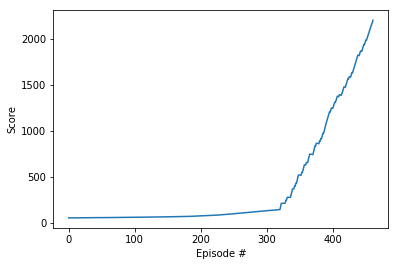

In [9]:
# plot the scores
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(mean_rewards)), mean_rewards)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [25]:
agent = loadTrainedModel(agent, model_dir+model_name)

In [8]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
t = 0                                                  # keep track of the trajectory
while True:
    actions = agent.act(states)                        # select an action (for each agent)
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.all(dones):                                  # exit loop if episode finished
        break
#print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 248.24059095897732


In [9]:
env.close()